In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-accidents/traffic_accidents.csv


# **Libraries Import**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input, Embedding, Flatten, Concatenate, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

# Configure Visuals
sns.set(style="whitegrid", palette="muted")
print("Libraries Imported Successfully.")

Libraries Imported Successfully.


In [56]:
df = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')

In [57]:
print("Shape:", df.shape)

Shape: (209306, 24)


In [58]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64


In [59]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [60]:
display(df.head())

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


# **EDA**

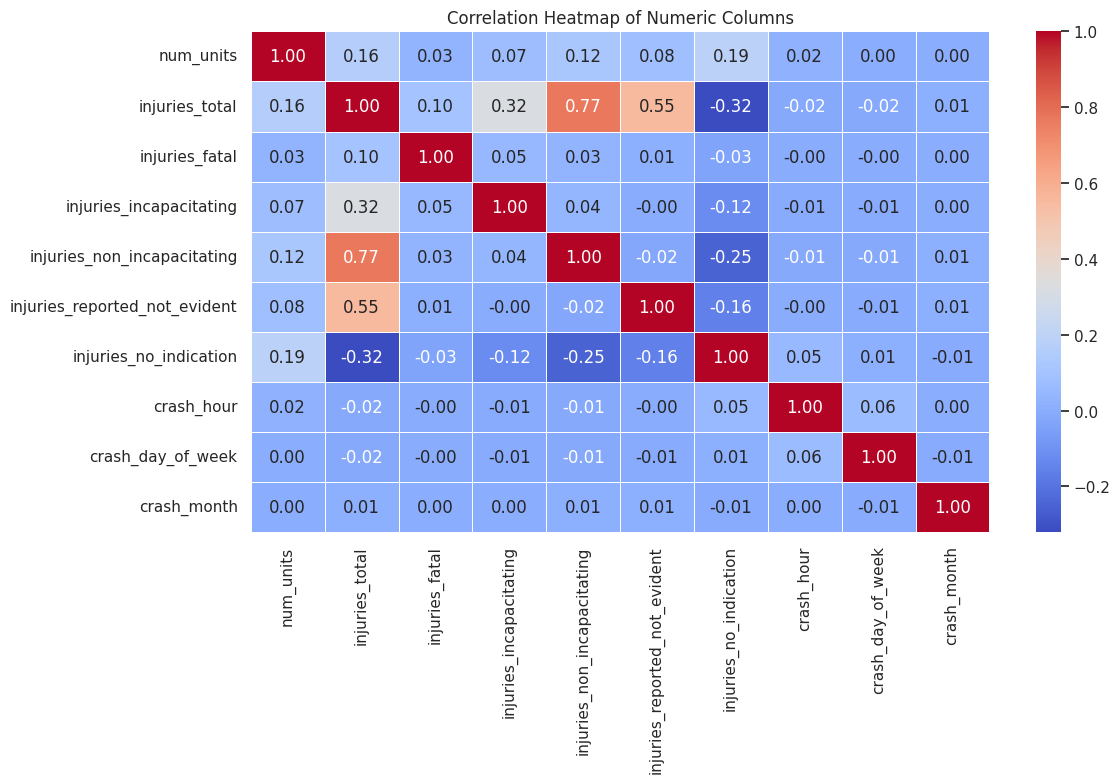

In [61]:
# Visualizing numeric correlations.
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

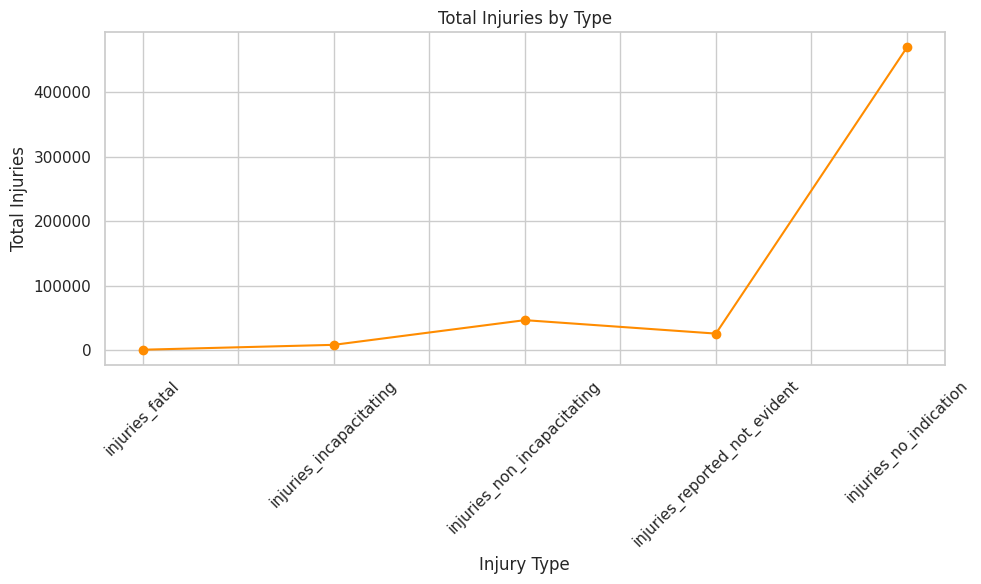

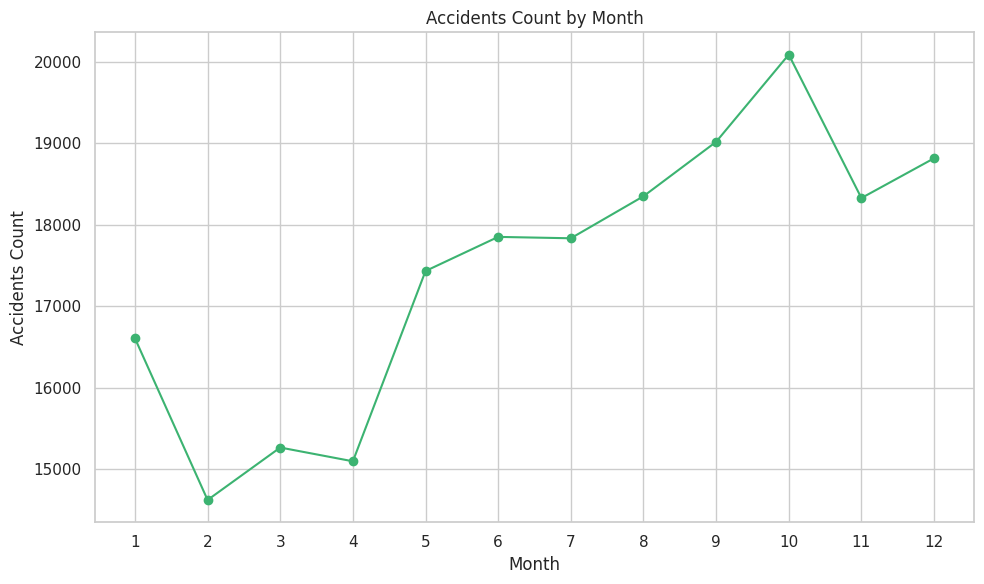

In [62]:
# Plotting injury types and accidents over time.
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
# Check if columns exist before summing
existing_injury_cols = [c for c in injury_types if c in df.columns]
injury_totals = df[existing_injury_cols].sum()

# Plot Injuries
plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='darkorange')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Accidents by Month
if 'crash_month' in df.columns:
    accidents_by_month = df['crash_month'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    accidents_by_month.plot(kind='line', marker='o', color='mediumseagreen')
    plt.title('Accidents Count by Month')
    plt.xlabel('Month')
    plt.ylabel('Accidents Count')
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()

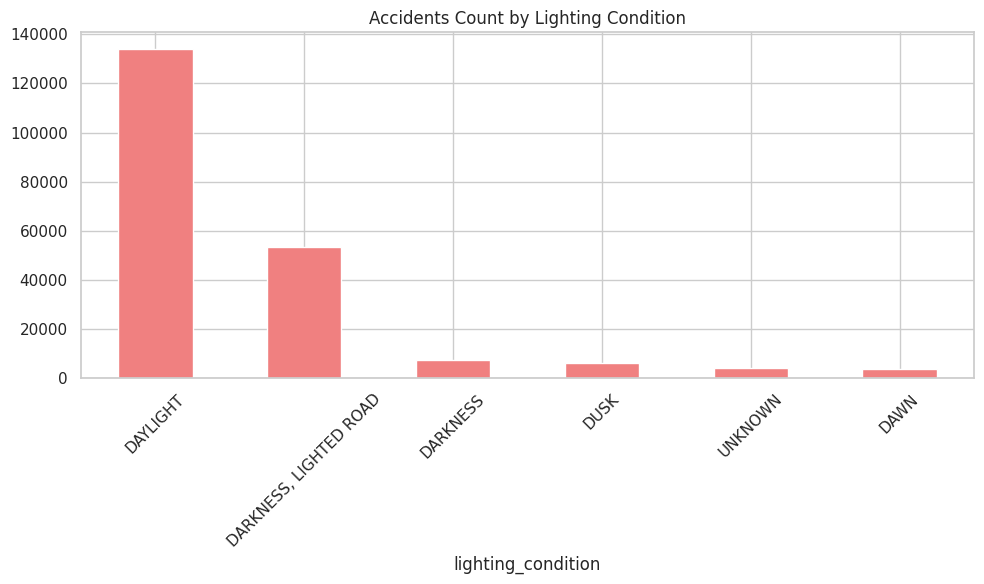

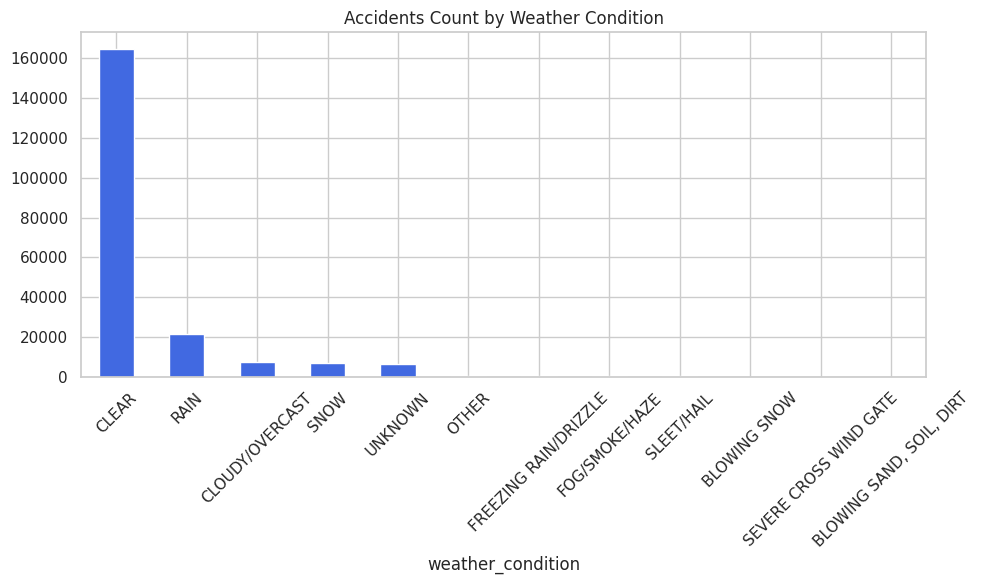

In [63]:
# Bar charts for environmental conditions.
# Lighting
accidents_by_light = df['lighting_condition'].value_counts()
plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar', color='lightcoral')
plt.title('Accidents Count by Lighting Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weather
accidents_by_weather = df['weather_condition'].value_counts()
plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='royalblue')
plt.title('Accidents Count by Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

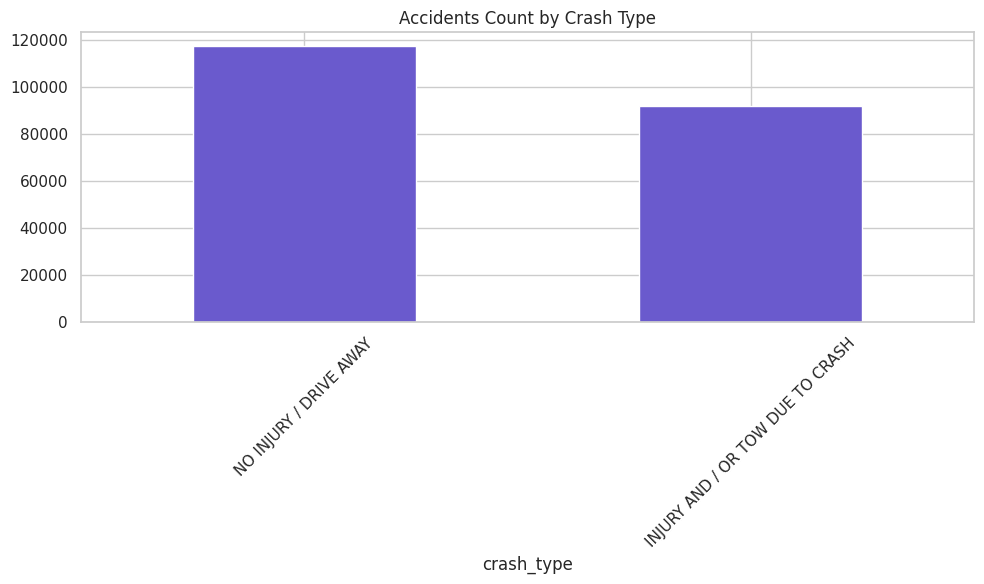

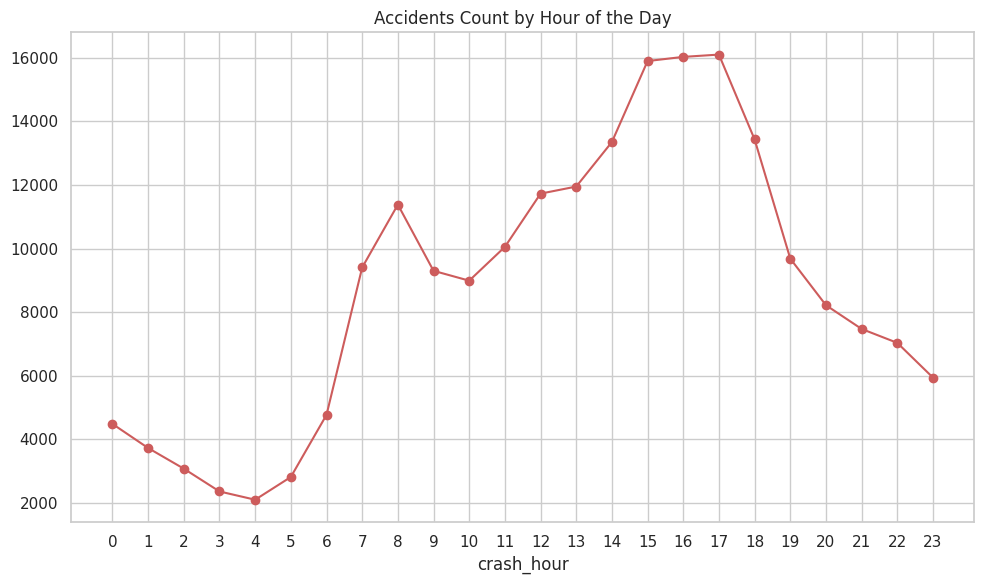

In [64]:
# Analyzing crash configurations and time of day.
# Crash Type
accidents_by_type = df['crash_type'].value_counts()
plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='slateblue')
plt.title('Accidents Count by Crash Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hour of Day
accidents_by_hour = df['crash_hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='indianred')
plt.title('Accidents Count by Hour of the Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

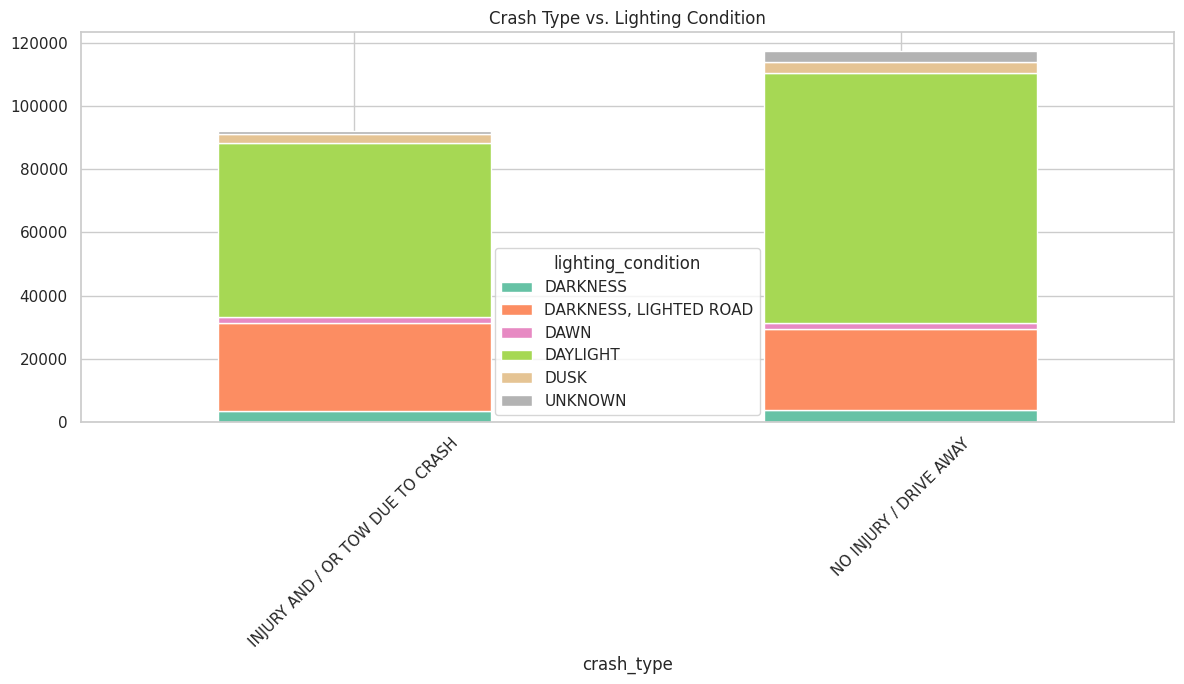

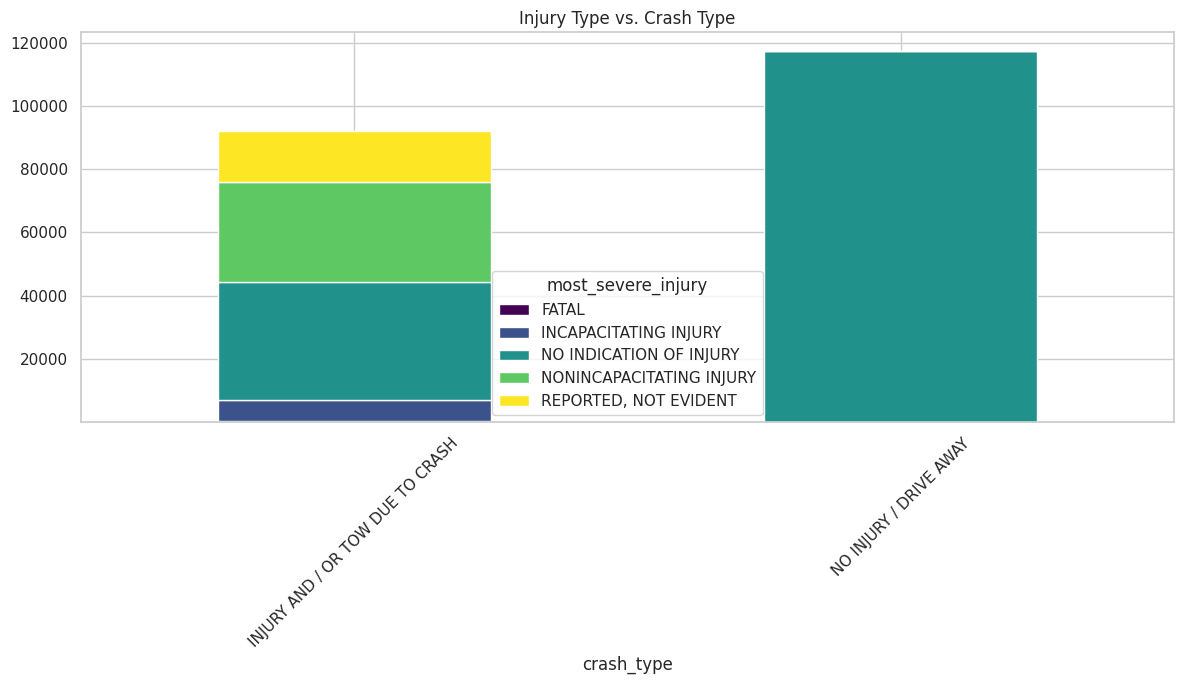

In [65]:
# stacked bars for interactions between variables.
# Crash Type vs Lighting
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])
accidents_by_crash_and_light.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crash Type vs Injury Severity
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])
injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Preprocessing**

In [66]:
# Drop columns that may leak data
cols_to_drop = [
    'crash_date', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 
    'injuries_incapacitating', 'injuries_non_incapacitating', 
    'injuries_reported_not_evident', 'injuries_no_indication', 'damage', 'target'
]

In [67]:
# Target Variable
severity_map = {
    'NO INDICATION': 0, 'REPORTED, NOT EVIDENT': 0,
    'NONINCAPACITATING INJURY': 1, 'NONINCAPACITATING': 1,
    'INCAPACITATING INJURY': 2, 'INCAPACITATING': 2,
    'FATAL': 2
}
df['target'] = df['most_severe_injury'].map(severity_map).fillna(0).astype(int)

In [68]:
# Feature Engineering
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['hour'] = df['crash_date'].dt.hour
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_rush_hour'] = df['crash_hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

/tmp/ipykernel_47/3651376687.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


In [69]:
# Define X and y
X = df.drop(columns=cols_to_drop, errors='ignore')
y = df['target']

In [70]:
feature_cols = X.columns.tolist()

# **Encoding and Splitting data**

In [71]:
# One-Hot Encoding Features only
# Keeping Target 1D for Classical Models
# Convert categorical variables to 0/1 columns. 
# drop_first=True avoids multicollinearity (good for Linear/Logistic Regression)
X_encoded = pd.get_dummies(X, drop_first=True) 

In [72]:
# 2. Split Data
# use the original'y' here, another one will be used for the NN
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [73]:
# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Save artifacts
# with open('preprocessors.pkl', 'wb') as f:
#     pickle.dump((scaler), f)

In [74]:
print(f"Input Shape: {X_train_scaled.shape}")
print(f"Target Shape: {y_train.shape}")

Input Shape: (167444, 137)
Target Shape: (167444,)


In [75]:
# Global Leaderboard List
leaderboard = []

def get_metrics(y_true, y_pred, model_name):
    """Calculates metrics and adds them to the leaderboard."""
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    
    return {
        'Model': model_name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec
    }

def plot_history(history, title="Model Training"):
    """Plots accuracy and loss curves."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Accuracy Plot
    ax1.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    if 'val_accuracy' in history.history:
        ax1.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
    ax1.set_title(f'{title} - Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss Plot
    ax2.plot(history.history['loss'], label='Train Loss', color='blue')
    if 'val_loss' in history.history:
        ax2.plot(history.history['val_loss'], label='Val Loss', color='orange')
    ax2.set_title(f'{title} - Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

# **Classical ML Models**

**Model 1: Logistic Regression**

In [76]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
log_pred = log_reg.predict(X_test_scaled) # Unique variable

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.4f}")
leaderboard.append(get_metrics(y_test, log_pred, 'Logistic Regression'))

Logistic Regression Accuracy: 0.6709


**Model 2: XGBoost**

In [77]:
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    use_label_encoder=False, 
    eval_metric='mlogloss'
)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled) # Unique variable

print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
leaderboard.append(get_metrics(y_test, xgb_pred, 'XGBoost'))

XGBoost Accuracy: 0.8416


**Model 3: Random Forest**

In [78]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled) # Unique variable

print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
leaderboard.append(get_metrics(y_test, rf_pred, 'Random Forest'))

Random Forest Accuracy: 0.8275


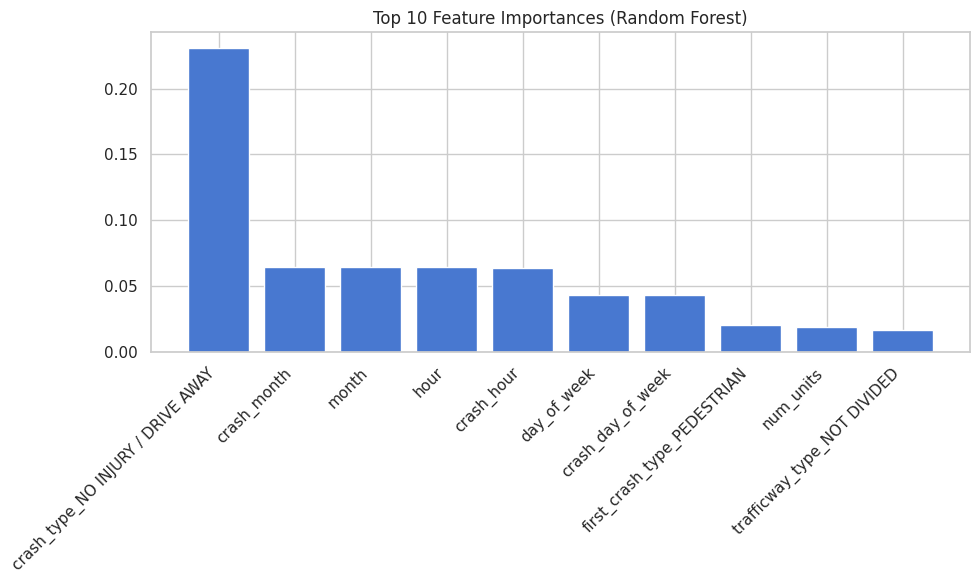

In [79]:
# Update feature names to match the encoded data
feature_cols = X_encoded.columns.tolist()
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10] # Top 10

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices], align="center")

plt.xticks(range(10), [feature_cols[i] for i in indices], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **Deep Learning Models**

**NN-1 using ResNet Architecture compiled with focal loss**

In [80]:
# We split the previous 'test' set to create a Validation set for training
X_val_scaled, X_test_final_scaled, y_val, y_test_final = train_test_split(
    X_test_scaled, y_test, test_size=0.5, random_state=42
)

# One-Hot Encoding
y_train_nn = to_categorical(y_train)
y_val_nn = to_categorical(y_val)
y_test_nn = to_categorical(y_test_final)

def focal_loss_fixed(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    cross_entropy = -y_true * K.log(y_pred)
    weight = alpha * y_true * K.pow((1 - y_pred), gamma)
    loss = weight * cross_entropy
    return K.sum(loss, axis=1)

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=0.001, first_decay_steps=1000, t_mul=2.0, m_mul=0.9, alpha=0.0
)

# RESIDUAL ARCHITECTURE
input_layer = Input(shape=(X_train_scaled.shape[1],))
x = Dense(128, activation='relu', kernel_initializer='he_normal')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

skip = x
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Add()([x, skip])

wide = Dense(64, activation='relu')(input_layer)
merged = Concatenate()([x, wide])
output_layer = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(merged)

model_resnet = Model(inputs=input_layer, outputs=output_layer)
model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
    loss=focal_loss_fixed, 
    metrics=['accuracy']
)

# Train
history = model_resnet.fit(
    X_train_scaled, y_train_nn,
    validation_data=(X_val_scaled, y_val_nn),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Predict on the FINAL hold-out test set
nn_probs = model_resnet.predict(X_test_final_scaled)
nn_pred_resnet = np.argmax(nn_probs, axis=1)

print(f"ResNet Accuracy: {accuracy_score(y_test_final, nn_pred_resnet):.4f}")
leaderboard.append(get_metrics(y_test_final, nn_pred_resnet, 'ResNet NN'))

Epoch 1/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7965 - loss: 0.0592 - val_accuracy: 0.8362 - val_loss: 0.0374
Epoch 2/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8383 - loss: 0.0366 - val_accuracy: 0.8356 - val_loss: 0.0365
Epoch 3/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8421 - loss: 0.0356 - val_accuracy: 0.8352 - val_loss: 0.0379
Epoch 4/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8396 - loss: 0.0360 - val_accuracy: 0.8369 - val_loss: 0.0367
Epoch 5/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8440 - loss: 0.0348 - val_accuracy: 0.8382 - val_loss: 0.0360
Epoch 6/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8469 - loss: 0.0341 - val_accuracy: 0.8326 - val_loss: 0.0374
Epoch 7/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8421 - loss: 0.0353 - val_accuracy: 0.8361 - val_loss: 0.0366
Epoch 8/50
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8446 - loss: 0

In [81]:
experiments_config = [
    {'name': "Standard", 'bs': 32, 'lr': 0.001},
    {'name': "High LR & Batch", 'bs': 128, 'lr': 0.01},
    {'name': "Low LR", 'bs': 32, 'lr': 0.0001},
    {'name': "Adam_Std", 'bs': 32, 'lr': 0.001, 'opt': 'adam'},
    {'name': "SGD_Std", 'bs': 32, 'lr': 0.01, 'opt': 'sgd'},
]

for exp in experiments_config:
    print(f"\n Experiment: {exp['name']} (BS={exp['bs']}, LR={exp['lr']}) ---")
    
    model_exp = Sequential([
        Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(3, activation='softmax')
    ])
    #kernel_initializer='glorot_uniform'
    model_exp.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=exp['lr']), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    hist = model_exp.fit(X_train_scaled, y_train, batch_size=exp['bs'], epochs=10, verbose=1)
    print(f"Final Training Accuracy: {hist.history['accuracy'][-1]:.4f}")


 Experiment: Standard (BS=32, LR=0.001) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8306 - loss: 0.4190
Epoch 2/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8439 - loss: 0.3598
Epoch 3/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8449 - loss: 0.3560
Epoch 4/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8463 - loss: 0.3517
Epoch 5/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8451 - loss: 0.3523
Epoch 6/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8439 - loss: 0.3527
Epoch 7/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8466 - loss: 0.3494
Epoch 8/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8456 - loss: 0.3488
Epoch 9/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8466 - loss: 0.3480
Epoch 10/10
5233/5233 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8470 - loss: 0.3472
Final Training Accuracy: 0.8461

 Experiment: High LR & Batch (BS=128, LR=0.01) ---
Epoch 1/10
1309/1309 ━━━━

**Plotting training history and confusion matrices for the ResNet NN Model Compiled with Focal Loss & Cosine Decay**

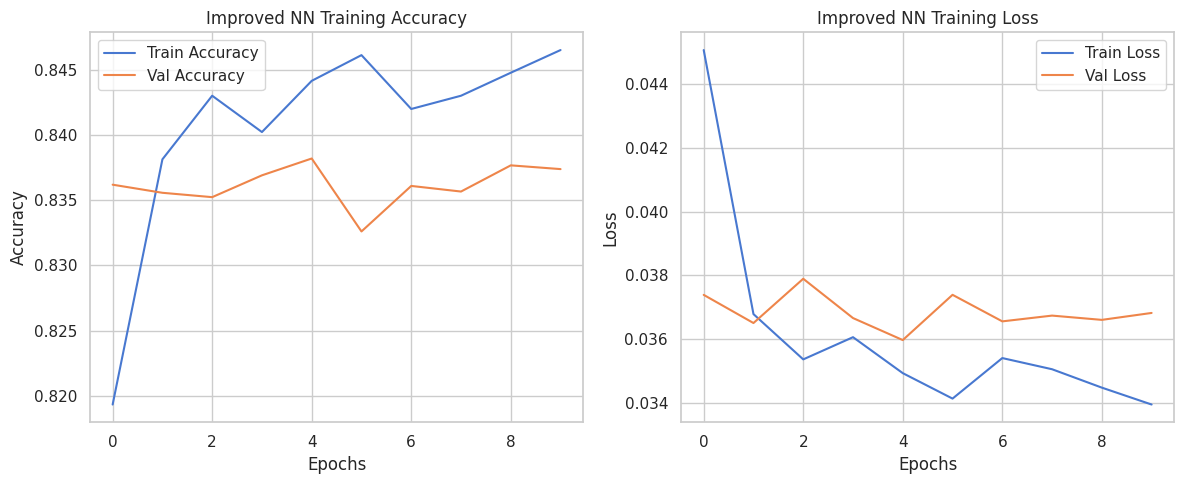

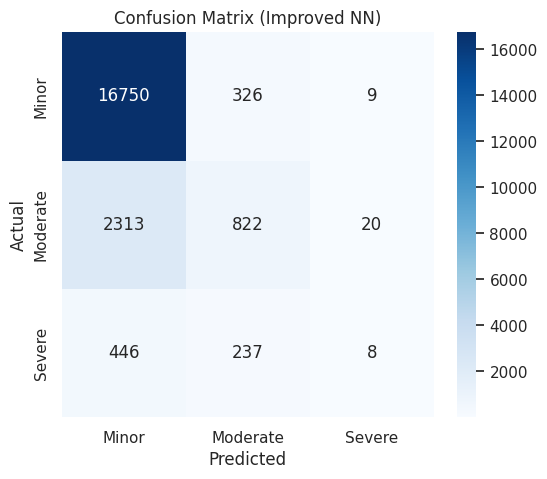

In [82]:
# Training Curves plot
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved NN Training Accuracy') # Updated title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Improved NN Training Loss') # Updated title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_curves_improved.png')
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test_final, nn_pred_resnet)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Minor', 'Moderate', 'Severe'], 
            yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix (Improved NN)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [83]:
print(classification_report(y_test_final, nn_pred_resnet, target_names=['Minor', 'Moderate', 'Severe'], zero_division=0))

              precision    recall  f1-score   support

       Minor       0.86      0.98      0.92     17085
    Moderate       0.59      0.26      0.36      3155
      Severe       0.22      0.01      0.02       691

    accuracy                           0.84     20931
   macro avg       0.56      0.42      0.43     20931
weighted avg       0.80      0.84      0.80     20931



# Preprocess the data for other models

**Redefining X, y for another Model**

In [84]:
# RESAMPLING PREP: SPLIT
# Redefining split on original X, y
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Calculating Class Weights**

In [85]:
# This tells the model: "Pay 10x attention to Severe crashes, 1x attention to Minor crashes"
class_weights_vals = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights_vals))
print(f"Class Weights calculated: {class_weights_dict}")

Class Weights calculated: {0: 0.4083272978225828, 1: 2.21302353858557, 2: 10.08941913714148}


# **NN_1.1 Weighted ResNet**

TRAINING (Weighted ResNet)
Epoch 1/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6252 - loss: 0.1297 - val_accuracy: 0.6932 - val_loss: 0.0779
Epoch 2/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6755 - loss: 0.0807 - val_accuracy: 0.6505 - val_loss: 0.0858
Epoch 3/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6750 - loss: 0.0789 - val_accuracy: 0.6897 - val_loss: 0.0807
Epoch 4/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6733 - loss: 0.0785 - val_accuracy: 0.6954 - val_loss: 0.0743
Epoch 5/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6760 - loss: 0.0771 - val_accuracy: 0.6842 - val_loss: 0.0794
Epoch 6/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6808 - loss: 0.0760 - val_accuracy: 0.6529 - val_loss: 0.0834
Epoch 7/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6785 - loss: 0.0758 - val_accuracy: 0.7035 - val_loss: 0.0746
Epoch 8/30
2617/2617 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accura

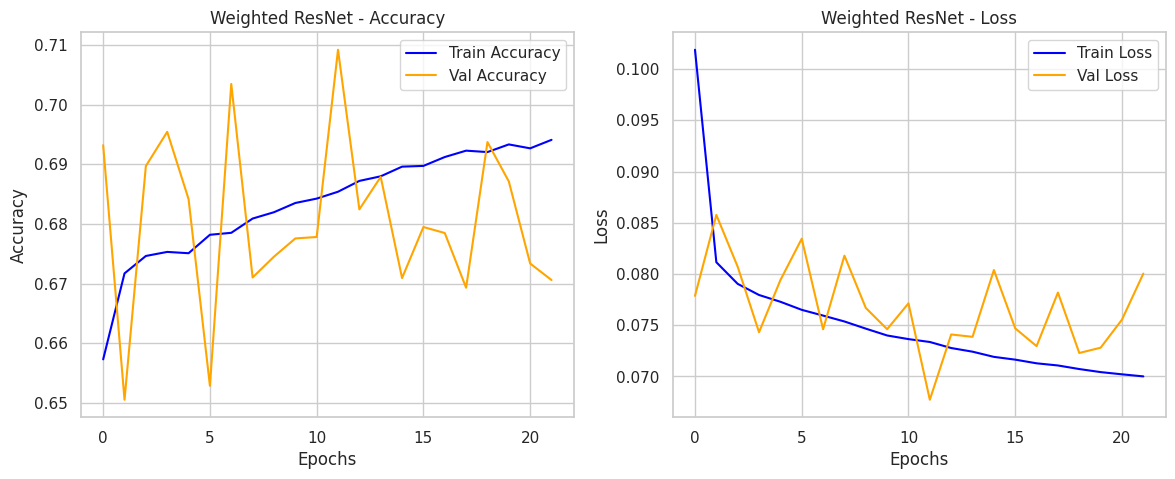

655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Weighted ResNet Accuracy: 0.7075


In [86]:
print("TRAINING (Weighted ResNet)")

# Model Definition (Same architecture)
input_layer = Input(shape=(X_train_scaled.shape[1],))
x = Dense(128, activation='relu', kernel_initializer='he_normal')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
skip = x
x = Dense(128, activation='relu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Add()([x, skip])
wide = Dense(64, activation='relu')(input_layer)
merged = Concatenate()([x, wide])
output_layer = Dense(3, activation='softmax')(merged)

model_weighted = Model(inputs=input_layer, outputs=output_layer)
model_weighted.compile(optimizer='adam', loss=focal_loss_fixed, metrics=['accuracy'])

# Train with Class Weights
history_a = model_weighted.fit(
    X_train_scaled, y_train_nn,
    validation_data=(X_val_scaled, y_val_nn),
    epochs=30, batch_size=64,
    class_weight=class_weights_dict, 
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)
plot_history(history_a, "Weighted ResNet")
# Predict
nn_probs = model_weighted.predict(X_test_final_scaled)
nn_pred_weighted = np.argmax(nn_probs, axis=1) # Unique variable

print(f"Weighted ResNet Accuracy: {accuracy_score(y_test_final, nn_pred_weighted):.4f}")
leaderboard.append(get_metrics(y_test_final, nn_pred_weighted, 'Weighted ResNet'))

# **Oversampling**

In [87]:
# Combine X and y temporarily to resample
train_data = X_train_raw.copy()
train_data['target'] = y_train

# Count how many samples represent the majority class >> Minor
max_size = train_data['target'].value_counts().max()

lst = [train_data]
for class_index, group in train_data.groupby('target'):
    # Resample the group to match the size of the majority class
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

# Concat the original data with the new duplicate samples
train_data_resampled = pd.concat(lst)

# Shuffle the data so the model doesn't learn order
train_data_resampled = train_data_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate back into X and y
y_train_resampled = train_data_resampled['target']
X_train_resampled_raw = train_data_resampled.drop('target', axis=1)

print(f"Original Train Size: {len(X_train_raw)}")
print(f"Resampled Train Size: {len(X_train_resampled_raw)}")
print(f"Class Distribution: {y_train_resampled.value_counts().to_dict()}")

Original Train Size: 167444
Resampled Train Size: 410073
Class Distribution: {2: 136691, 1: 136691, 0: 136691}


**ReStandardizing the data after Oversampling**

In [88]:
# Note: Applying ColumnTransformer AFTER resampling the raw data
# we will use X_train_resampled_raw

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Scale Resampled Train Data
X_train_resampled = preprocessor.fit_transform(X_train_resampled_raw)
# Scale Standard Test Data
X_test_transformed = preprocessor.transform(X_test_raw)

print(f"Processed Train Shape: {X_train_resampled.shape}")
print(f"Processed Test Shape: {X_test_transformed.shape}")

Processed Train Shape: (410073, 148)
Processed Test Shape: (41862, 148)


# **NN_2 using Class Weights and oversampling**

In [89]:
model_seq = Sequential()

# slightly reducing complexity because resampling simplifies the boundary
model_seq.add(Dense(128, input_dim=X_train_resampled.shape[1]))
model_seq.add(BatchNormalization())
model_seq.add(Activation('relu'))
model_seq.add(Dropout(0.3))

model_seq.add(Dense(64))
model_seq.add(BatchNormalization())
model_seq.add(Activation('relu'))
model_seq.add(Dropout(0.3))

model_seq.add(Dense(32))
model_seq.add(Activation('relu'))

model_seq.add(Dense(3, activation='softmax'))

model_seq.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_seq.summary()
print("2nd NN Model using SMOTE compiled.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,275 (118.26 KB)

 Trainable params: 29,891 (116.76 KB)

 Non-trainable params: 384 (1.50 KB)

2nd NN Model using SMOTE compiled.


In [90]:
# Stop training if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Reduce learning rate if accuracy gets stuck
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=0.0001
)

history_seq = model_seq.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,              
    batch_size=64,
    validation_data=(X_test_transformed, y_test), 
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5875 - loss: 0.7715 - val_accuracy: 0.6585 - val_loss: 0.6125 - learning_rate: 0.0010
Epoch 2/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6275 - loss: 0.7201 - val_accuracy: 0.6663 - val_loss: 0.6070 - learning_rate: 0.0010
Epoch 3/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6457 - loss: 0.7010 - val_accuracy: 0.6638 - val_loss: 0.5949 - learning_rate: 0.0010
Epoch 4/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6566 - loss: 0.6900 - val_accuracy: 0.6704 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 5/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6633 - loss: 0.6804 - val_accuracy: 0.6675 - val_loss: 0.6017 - learning_rate: 0.0010
Epoch 6/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6692 - loss: 0.6722 - val_accuracy: 0.6634 - val_loss: 0.5985 - learning_rate: 0.0010
Epoch 7/50
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.6

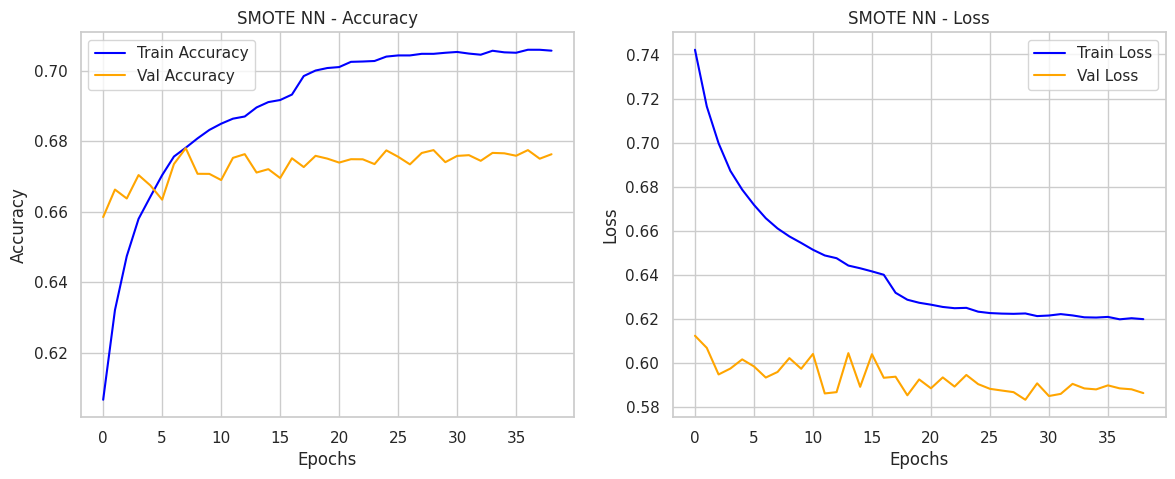

In [91]:
plot_history(history_seq, "SMOTE NN")

# **NN_3 using original X, y scaled**

In [95]:
# Using X_train_scaled and y_train directly
inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_simple = tf.keras.Model(inputs, outputs)

model_simple.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_func = model_simple.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    batch_size=40,
    epochs=40,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)],
    verbose=1
)

# Predict on standard scaled test set
nn_probs = model_simple.predict(X_test_scaled)
nn_pred_simple = np.argmax(nn_probs, axis=1) # Unique variable

print(f"Simple NN Accuracy: {accuracy_score(y_test, nn_pred_simple):.4f}")
leaderboard.append(get_metrics(y_test, nn_pred_simple, 'Simple Scaled NN'))

Epoch 1/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8352 - loss: 0.4022 - val_accuracy: 0.8453 - val_loss: 0.3585
Epoch 2/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8421 - loss: 0.3595 - val_accuracy: 0.8471 - val_loss: 0.3567
Epoch 3/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8463 - loss: 0.3530 - val_accuracy: 0.8467 - val_loss: 0.3597
Epoch 4/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8458 - loss: 0.3545 - val_accuracy: 0.8468 - val_loss: 0.3568
Epoch 5/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8445 - loss: 0.3520 - val_accuracy: 0.8471 - val_loss: 0.3577
Epoch 6/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8439 - loss: 0.3528 - val_accuracy: 0.8445 - val_loss: 0.3583
Epoch 7/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8452 - loss: 0.3494 - val_accuracy: 0.8466 - val_loss: 0.3579
Epoch 8/40
3349/3349 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8457 - loss: 0.3465 -

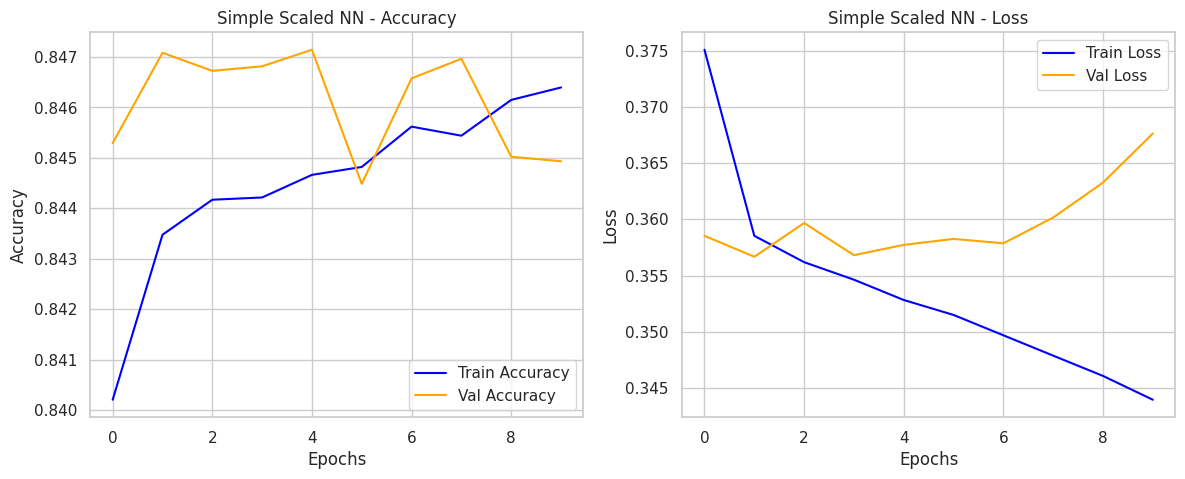

In [96]:
plot_history(history_func, "Simple Scaled NN")

In [97]:
# # Evaluation
# func_pred_probs = model_simple.predict(X_test_scaled)
# nn_pred_simple = np.argmax(func_pred_probs, axis=1)
acc_func = accuracy_score(y_test, nn_pred_simple)

print(f"3rd NN Model using scaled data Accuracy: {acc_func:.4f}")
print(classification_report(y_test, nn_pred_simple, target_names=['Minor', 'Moderate', 'Severe'], zero_division=0))

3rd NN Model using scaled data Accuracy: 0.8407
              precision    recall  f1-score   support

       Minor       0.86      0.98      0.92     34173
    Moderate       0.60      0.25      0.35      6306
      Severe       0.00      0.00      0.00      1383

    accuracy                           0.84     41862
   macro avg       0.49      0.41      0.42     41862
weighted avg       0.79      0.84      0.80     41862



# **Experimenting with Multiple Layers, Optimizers, Initialization and BatchSize**

In [98]:
# print("\n=== STARTING NEURAL NETWORK EXPERIMENTS ===")
# from tensorflow.keras.layers import LeakyReLU
# def build_experiment_model(input_dim, layers=[128, 64], dropout=0.3, 
#                            activation='relu', initializer='he_normal'):
#     """Builder function to create models dynamically"""
#     model = Sequential()
    
#     # Input Layer
#     model.add(Dense(layers[0], input_dim=input_dim, activation=activation, kernel_initializer=initializer))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout))
    
#     # Hidden Layers
#     for units in layers[1:]:
#         model.add(Dense(units, activation=activation, kernel_initializer=initializer))
#         model.add(BatchNormalization())
#         model.add(Dropout(dropout))
        
#     # Output Layer (3 classes)
#     model.add(Dense(3, activation='softmax'))
#     return model

# # --- EXPERIMENTAL CONFIGURATIONS ---
# experiments = [
#     # Experiment A: Baseline (Adam, He Init, [128, 64])
#     {
#         'name': 'NN_Exp_Baseline',
#         'layers': [128, 64],
#         'optimizer': Adam(learning_rate=0.001),
#         'init': 'he_normal',
#         'batch_size': 64
#     },
#     # Experiment B: SGD with Momentum (Often generalizes better)
#     {
#         'name': 'NN_Exp_SGD_Momentum',
#         'layers': [128, 64],
#         'optimizer': SGD(learning_rate=0.01, momentum=0.9),
#         'init': 'he_normal',
#         'batch_size': 64
#     },
#     # Experiment C: Deeper Network + Xavier (Glorot) Init
#     {
#         'name': 'NN_Exp_Deep_Xavier',
#         'layers': [256, 128, 64, 32],
#         'optimizer': Adam(learning_rate=0.001),
#         'init': 'glorot_uniform', # Xavier
#         'batch_size': 128
#     },
#      # Experiment D: RMSprop
#     {
#         'name': 'NN_Exp_RMSprop',
#         'layers': [128, 64],
#         'optimizer': RMSprop(learning_rate=0.001),
#         'init': 'he_normal',
#         'batch_size': 64
#     }
# ]

# # --- RUN LOOP ---
# for exp in experiments:
#     print(f"\n--- Running: {exp['name']} ---")
#     print(f"Config: Opt={exp['optimizer'].__class__.__name__}, Layers={exp['layers']}, Init={exp['init']}")
    
#     model = build_experiment_model(
#         input_dim=X_train_scaled.shape[1], 
#         layers=exp['layers'], 
#         initializer=exp['init']
#     )
    
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=exp['optimizer'], metrics=['accuracy'])
    
#     # LRScheduler: Reduce LR if validation loss stagnates
#     lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)
#     early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    
#     history = model.fit(
#         X_train_scaled, y_train,
#         validation_split=0.2,
#         epochs=30, # Keep it reasonable for experiments
#         batch_size=exp['batch_size'],
#         class_weight=weight_dict, # Handle imbalance
#         callbacks=[lr_scheduler, early_stop],
#         verbose=0 # Silence detailed epoch logs to keep notebook clean
#     )
    
#     # Evaluate
#     y_pred_probs = model.predict(X_test_scaled)
#     y_pred = np.argmax(y_pred_probs, axis=1)
    
#     leaderboard.append(evaluate_model(exp['name'], y_test, y_pred))

# **Evaluation**


FINAL MODEL LEADERBOARD


,Model,Accuracy,F1 Score,Precision,Recall
0,ResNet NN,0.839903,0.802548,0.797416,0.839903
1,Simple Scaled NN,0.840691,0.800631,0.789900,0.840691
2,XGBoost,0.841575,0.800238,0.808145,0.841575
3,Random Forest,0.827481,0.799209,0.784738,0.827481
4,Weighted ResNet,0.707467,0.749326,0.864998,0.707467
5,SMOTE NN,0.682266,0.737312,0.868867,0.682266
6,Logistic Regression,0.670871,0.733417,0.866651,0.670871


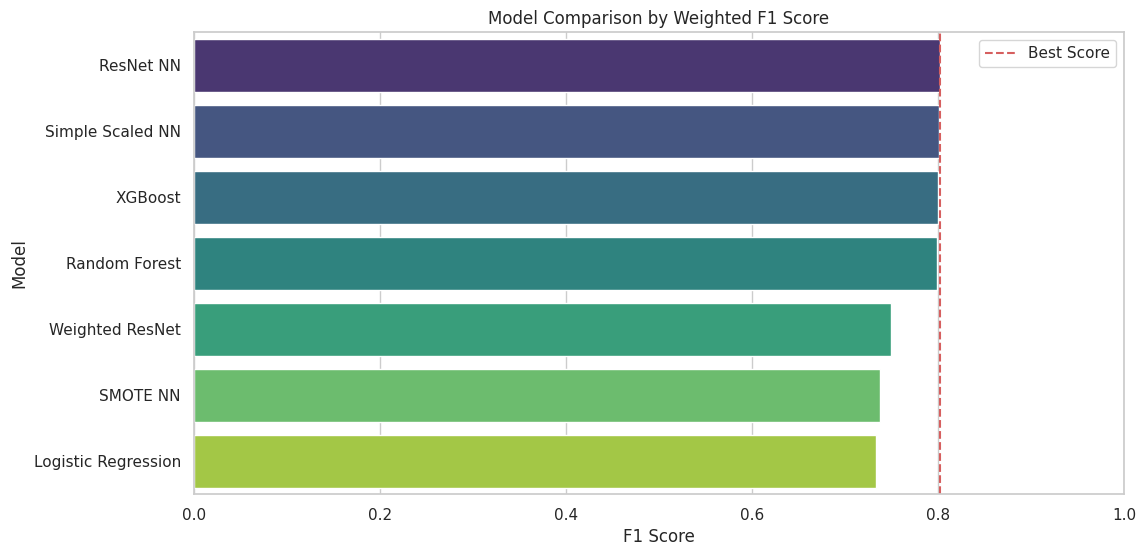


 === DETAILED CLASSIFICATION REPORTS ===

--- Report for: Logistic Regression ---
              precision    recall  f1-score   support

       Minor       1.00      0.69      0.81     34173
    Moderate       0.31      0.62      0.42      6306
      Severe       0.12      0.52      0.20      1383

    accuracy                           0.67     41862
   macro avg       0.48      0.61      0.48     41862
weighted avg       0.87      0.67      0.73     41862


--- Report for: XGBoost ---
              precision    recall  f1-score   support

       Minor       0.86      0.99      0.92     34173
    Moderate       0.62      0.24      0.35      6306
      Severe       0.50      0.00      0.00      1383

    accuracy                           0.84     41862
   macro avg       0.66      0.41      0.42     41862
weighted avg       0.81      0.84      0.80     41862


--- Report for: Random Forest ---
              precision    recall  f1-score   support

       Minor       0.86      0.96   

In [100]:
# Displaying final comparison table, plots, and classification reports.

print("\nFINAL MODEL LEADERBOARD")
# 1. Create & Display DataFrame
results_df = pd.DataFrame(leaderboard)
# Sort by F1 Score to see the best on top
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

display(results_df.style.background_gradient(cmap='Greens', subset=['Accuracy', 'F1 Score', 'Precision', 'Recall']))

# 2. Visual Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison by Weighted F1 Score')
plt.xlim(0, 1.0)
plt.axvline(results_df['F1 Score'].max(), color='r', linestyle='--', label='Best Score')
plt.legend()
plt.show()

print("\n === DETAILED CLASSIFICATION REPORTS ===")

# Mapping models to their specific Test Sets and Prediction Variables
model_reports = {
    "Logistic Regression": (y_test, log_pred),
    "XGBoost":             (y_test, xgb_pred),
    "Random Forest":       (y_test, rf_pred),
    "ResNet NN":           (y_test_final, nn_pred_resnet),    # <--- Uses Final Split
    "Weighted ResNet":     (y_test_final, nn_pred_weighted),  # <--- Uses Final Split
    "SMOTE NN":            (y_test, nn_pred_smote),           # <--- Uses Full Test
    "Simple Scaled NN":    (y_test, nn_pred_simple)           # <--- Uses Full Test
}

for model_name, (y_true, y_pred_vals) in model_reports.items():
    print(f"\n--- Report for: {model_name} ---")
    print(classification_report(y_true, y_pred_vals, target_names=['Minor', 'Moderate', 'Severe'], zero_division=0))

best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1 Score']
print(f"\n The Best Performing Model is: {best_model_name} with F1: {best_f1:.4f}")

In [101]:
import numpy as np

# 1. Define Class Mapping
class_map = {0: 'Minor', 1: 'Moderate', 2: 'Severe'}

# 2. Select 10 random indices from the test set
# We use the length of X_test_scaled to ensure we stay within bounds
indices = np.random.choice(range(len(X_test_scaled)), size=15, replace=False)

# 3. Print Header
print(f"{'Index':<6} | {'Actual':<10} | {'LogReg':<10} | {'RF':<10} | {'XGB':<10} | {'ResNet':<10} | {'Weighted':<10} | {'SMOTE':<10} | {'Simple':<10}")
print("-" * 115)

# 4. Iterate and Predict
for i in indices:
    # --- Get Actual Label ---
    # Use .iloc if y_test is a Series, or simple indexing if it's an array
    if hasattr(y_test, 'iloc'):
        actual_code = y_test.iloc[i]
    else:
        actual_code = y_test[i]
    actual = class_map[int(actual_code)]
    
    # --- Prepare Input Data ---
    
    # A. Standard Scaled Input (For most models)
    # Reshape to (1, n_features) because models expect a batch
    sample_scaled = X_test_scaled[i].reshape(1, -1)
    
    # B. SMOTE Transformed Input (For SMOTE NN only)
    # This must correspond to the same row index 'i'
    sample_smote = X_test_transformed[i].reshape(1, -1)
    
    # --- Make Predictions ---
    
    # 1. Classical Models
    # .predict() returns the class label directly
    lr_p  = class_map[int(log_reg.predict(sample_scaled)[0])]
    rf_p  = class_map[int(rf.predict(sample_scaled)[0])]
    xgb_p = class_map[int(xgb_model.predict(sample_scaled)[0])]
    
    # 2. Neural Networks
    # .predict() returns probabilities, so we use np.argmax()
    # NN-1: ResNet
    resnet_prob = model_resnet.predict(sample_scaled, verbose=0)
    resnet_p    = class_map[np.argmax(resnet_prob)]
    
    # NN-1.1: Weighted ResNet
    weighted_prob = model_weighted.predict(sample_scaled, verbose=0)
    weighted_p    = class_map[np.argmax(weighted_prob)]
    
    # NN-2: SMOTE (Uses sample_smote!)
    smote_prob = model_smote.predict(sample_smote, verbose=0)
    smote_p    = class_map[np.argmax(smote_prob)]
    
    # NN-3: Simple Scaled
    simple_prob = model_simple.predict(sample_scaled, verbose=0)
    simple_p    = class_map[np.argmax(simple_prob)]
    
    # --- Print Row ---
    print(f"{i:<6} | {actual:<10} | {lr_p:<10} | {rf_p:<10} | {xgb_p:<10} | {resnet_p:<10} | {weighted_p:<10} | {smote_p:<10} | {simple_p:<10}")

Index  | Actual     | LogReg     | RF         | XGB        | ResNet     | Weighted   | SMOTE      | Simple    
-------------------------------------------------------------------------------------------------------------------
13435  | Minor      | Moderate   | Minor      | Minor      | Minor      | Moderate   | Moderate   | Minor     
40851  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor     
8204   | Minor      | Moderate   | Minor      | Minor      | Minor      | Moderate   | Moderate   | Minor     
29288  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor     
4050   | Minor      | Moderate   | Moderate   | Minor      | Minor      | Moderate   | Severe     | Minor     
26421  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor     
40678  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor  

In [102]:
class_map = {0: 'Minor', 1: 'Moderate', 2: 'Severe'}

# 2. Select 10 random indices from the test set
# We use the length of X_test_scaled to ensure we stay within bounds
indices = np.random.choice(range(len(X_test_scaled)), size=15, replace=False)

# 3. Print Header
print(f"{'Index':<6} | {'Actual':<10} | {'LogReg':<10} | {'RF':<10} | {'XGB':<10} | {'ResNet':<10} | {'Weighted':<10} | {'SMOTE':<10} | {'Simple':<10}")
print("-" * 115)

# 4. Iterate and Predict
for i in indices:
    # --- Get Actual Label ---
    # Use .iloc if y_test is a Series, or simple indexing if it's an array
    if hasattr(y_test, 'iloc'):
        actual_code = y_test.iloc[i]
    else:
        actual_code = y_test[i]
    actual = class_map[int(actual_code)]
    
    # --- Prepare Input Data ---
    
    # A. Standard Scaled Input (For most models)
    # Reshape to (1, n_features) because models expect a batch
    sample_scaled = X_test_scaled[i].reshape(1, -1)
    
    # B. SMOTE Transformed Input (For SMOTE NN only)
    # This must correspond to the same row index 'i'
    sample_smote = X_test_transformed[i].reshape(1, -1)
    
    # --- Make Predictions ---
    
    # 1. Classical Models
    # .predict() returns the class label directly
    lr_p  = class_map[int(log_reg.predict(sample_scaled)[0])]
    rf_p  = class_map[int(rf.predict(sample_scaled)[0])]
    xgb_p = class_map[int(xgb_model.predict(sample_scaled)[0])]
    
    # 2. Neural Networks
    # .predict() returns probabilities, so we use np.argmax()
    # NN-1: ResNet
    resnet_prob = model_resnet.predict(sample_scaled, verbose=0)
    resnet_p    = class_map[np.argmax(resnet_prob)]
    
    # NN-1.1: Weighted ResNet
    weighted_prob = model_weighted.predict(sample_scaled, verbose=0)
    weighted_p    = class_map[np.argmax(weighted_prob)]
    
    # NN-2: SMOTE (Uses sample_smote!)
    smote_prob = model_smote.predict(sample_smote, verbose=0)
    smote_p    = class_map[np.argmax(smote_prob)]
    
    # NN-3: Simple Scaled
    simple_prob = model_simple.predict(sample_scaled, verbose=0)
    simple_p    = class_map[np.argmax(simple_prob)]
    
    # --- Print Row ---
    print(f"{i:<6} | {actual:<10} | {lr_p:<10} | {rf_p:<10} | {xgb_p:<10} | {resnet_p:<10} | {weighted_p:<10} | {smote_p:<10} | {simple_p:<10}")

Index  | Actual     | LogReg     | RF         | XGB        | ResNet     | Weighted   | SMOTE      | Simple    
-------------------------------------------------------------------------------------------------------------------
9235   | Moderate   | Moderate   | Minor      | Minor      | Minor      | Moderate   | Moderate   | Minor     
37764  | Minor      | Moderate   | Minor      | Minor      | Minor      | Moderate   | Moderate   | Minor     
20629  | Minor      | Moderate   | Minor      | Minor      | Minor      | Moderate   | Moderate   | Minor     
6323   | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor     
22383  | Moderate   | Severe     | Moderate   | Moderate   | Moderate   | Moderate   | Severe     | Moderate  
11343  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor     
12716  | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor      | Minor  